# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
real_estate_data = pd.read_csv(filepath_or_buffer = '/datasets/real_estate_data.csv', sep = '\t')

In [3]:
real_estate_data.head().T

,0,1,2,3,4
total_images,20,7,10,0,2
last_price,13000000.0,3350000.0,5196000.0,64900000.0,10000000.0
total_area,108.0,40.4,56.0,159.0,100.0
first_day_exposition,2019-03-07T00:00:00,2018-12-04T00:00:00,2015-08-20T00:00:00,2015-07-24T00:00:00,2018-06-19T00:00:00
rooms,3,1,2,3,2
ceiling_height,2.7,NaN,NaN,NaN,3.03
floors_total,16.0,11.0,5.0,14.0,14.0
living_area,51.0,18.6,34.3,NaN,32.0
floor,8,1,4,9,13
is_apartment,NaN,NaN,NaN,NaN,NaN


In [4]:
real_estate_data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
real_estate_data.info()  # 5 6 7 9 12 13 14 15 16 17 18 19 20 21 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

 *Пустоты есть в :*   
5)ceiling_height              
6)floors_total     
7)living_area             
9)is_apartment              
12  kitchen_area         
13  balcony               
14  locality_name         
15 airports_nearest       
16  cityCenters_nearest  
17  parks_around3000  
18  parks_nearest         
19  ponds_around3000       
20  ponds_nearest        
21 days_exposition   
  
  
 *Hе соответсвуют типу:*   
 
 3 first_day_exposition   
9   is_apartment

 *Следует полменять с флоат на инт :  *  

 6  floors_total          
13  balcony               
17  parks_around3000      
19  ponds_around3000      

In [6]:
real_estate_data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


1) total_images: На первый взгляд минимиальные и максимальные значения в порядке. Хотя где 0 фотографий можно использовать как дополнительный параметр для отсеивания 'спорных значений'   
2) last_price: максимальная цена тут может являться реальной, в то время как минимальная вызывает подозрения (похоже больше на аренду)    
3) total_area: min значение довольно таки мало  
4) rooms: 0 комнат это странно, максимальное значение вполне может быть   
5) ceiling_height: 100м - явно перебор, a 1м - меньше чем разрешено по закону, да и жить в нем будет проблематично..  
6) floors_total: с первого взгляда все впорядке  
7) living_area: жилая площадь в 2 квадрата выглядит слишком маленькой, надо изучить    
8) floor     
9) kitchen_area минимальное значение в 1.3 - явно ошибка, максимальное, впринципе возможно   
10) balcony    
11) airports_nearest - Квартира на расстоянии 0 - странно  
12) cityCenters_nearest : Выглядит правильно     
13) parks_around3000 : Выглядит правильно    
14) parks_nearest : Выглядит правильно     
15) ponds_around3000 : Выглядит правильно     
16) days_exposition : 1 день - мало, но возможно такое было в реальности, 1580 - много, но возможно такое было в реальности  

In [7]:
types = real_estate_data.dtypes.to_dict()
for i in types:
    
    if types[i] == 'object' :
        print(f'column name: {i}')
        print('  type of column: object')
        print(f'\tnumber of distinct elements : {real_estate_data[i].nunique()}')
       # print(f'\tnumber of distinct elements : {real_estate_data[i].unique()}')
        print(f'\tsamples : {real_estate_data[i].sample(4).values}')
       # print(f'\tunique_names {real_estate_data[i].unique()}')

        print(f'\tnul counts: {real_estate_data[i].isnull().sum()}')
        print(f'\tnul counts %: {np.round(real_estate_data[i].isnull().sum()/len(real_estate_data[i])*100,2)}%\n\n')
        
    if types[i] == 'bool' :
        print(f'column name: {i}')
        print('  type of column: bool')
        print(f'\tnumber of distinct elements')
        print(f'\tsamples: {real_estate_data[i].sample(4).values}')
        print(f'\tnul counts: {real_estate_data[i].isnull().sum()}')
        print(f'\tnul counts %: {np.round(real_estate_data[i].isnull().sum()/len(real_estate_data[i])*100,2)}%\n\n')
        

column name: first_day_exposition
  type of column: object
	number of distinct elements : 1491
	samples : ['2017-05-23T00:00:00' '2019-01-09T00:00:00' '2019-02-21T00:00:00'
 '2017-06-22T00:00:00']
	nul counts: 0
	nul counts %: 0.0%


column name: is_apartment
  type of column: object
	number of distinct elements : 2
	samples : [nan False nan nan]
	nul counts: 20924
	nul counts %: 88.29%


column name: studio
  type of column: bool
	number of distinct elements
	samples: [False False False False]
	nul counts: 0
	nul counts %: 0.0%


column name: open_plan
  type of column: bool
	number of distinct elements
	samples: [False False False False]
	nul counts: 0
	nul counts %: 0.0%


column name: locality_name
  type of column: object
	number of distinct elements : 364
	samples : ['Санкт-Петербург' 'Санкт-Петербург' 'деревня Низино' 'Санкт-Петербург']
	nul counts: 49
	nul counts %: 0.21%




1) first_day_exposition  - тут надо сделать формат  
2) is_apartment - тут надо сделать тип бул   
3) studio  - тут все ок   
4) open_plan  - тоже ок  
5) locality_name  - ok  

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

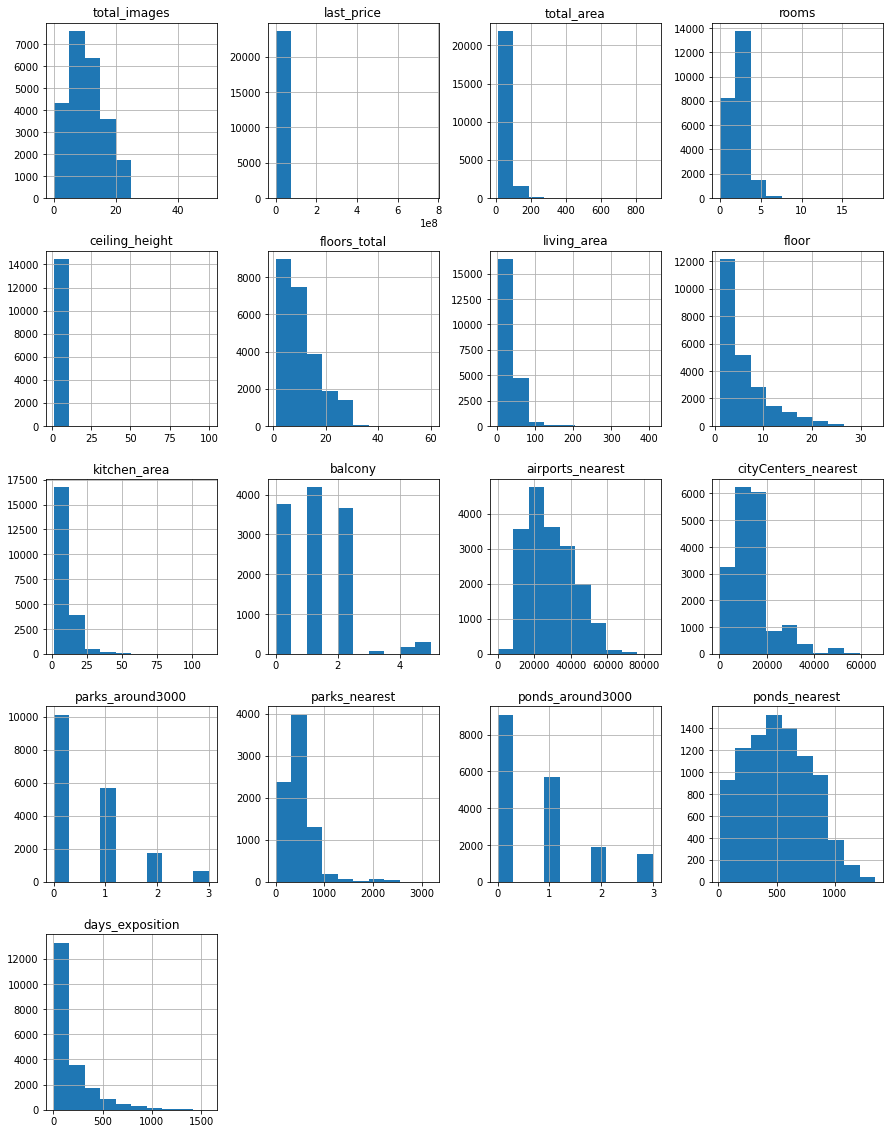

In [8]:
real_estate_data.hist(figsize=(15,20))

Вывод :   
1)Очень большое кол-во пропущенных значений   
2)Есть неправильные типы у столбцов  
3)Есть столбец с плохо читаемым форматом даты  

Идеи:  
1) Соотнести размер кухни с размером общей комнаты так как есть возможность что есть ошибочные данные   
2)  Где нет фото и есть странности с данными - вызывает подозрение  


### Предобработка данных

Заменим Nan значения у балконов на 0:


In [9]:
real_estate_data['balcony'].fillna(value = 0, inplace = True)


Приведём дату к читабельному виду:

In [10]:
#привел к формату даты 
real_estate_data['first_day_exposition'] = pd.to_datetime(real_estate_data['first_day_exposition'],format = '%Y-%m-%d')


In [11]:
#проверим на ноль комнат
real_estate_data[real_estate_data['rooms'] == 0]['rooms'].count() 

197

In [12]:
#197 зданий без комнат - это странно 
#я убираю эти строки так как могут плохо повлиять на данные и невозможно придумать какую-то модель по которой соотносить 
#(как например если ливинг была бы указана) 
#а учитывая соотношения к общему то на конечный результат вряд ли хоть как-то повлияет
zero_rooms_wt_living_room = real_estate_data[(real_estate_data['rooms'] == 0)&(real_estate_data['living_area'].isna())].index.to_list()
real_estate_data=real_estate_data.drop(zero_rooms_wt_living_room).reset_index(drop = True)

In [13]:
real_estate_data['rooms'] = real_estate_data['rooms'].replace(0,np.nan)
real_estate_data['rooms'] 
real_estate_data['rooms'].isna().sum()

183

In [14]:
real_estate_data['rooms'].isna().sum()

183

In [15]:
real_estate_data[real_estate_data['rooms'] == 0]['living_area'].sort_values()
#68 - макс значение для 0 

Series([], Name: living_area, dtype: float64)

In [16]:
# тут вот тут надо заполнить пропуски жил площади медиану по каждой комнате а потом уже на условиях сделать пропуски комнат от арии
median_value_gb_rooms = real_estate_data.groupby('rooms')['living_area'].median()

real_estate_data['living_area'] = real_estate_data['living_area'].fillna(real_estate_data['rooms'].map(median_value_gb_rooms))

In [17]:
median_value_gb_liv_area = round(real_estate_data.groupby('living_area')['rooms'].median())
real_estate_data['rooms'] = real_estate_data['rooms'].fillna(real_estate_data['living_area'].map(median_value_gb_liv_area))

In [18]:
median_value_gb_liv_area

living_area
2.0       2.0
3.0       2.0
5.0       NaN
5.4       4.0
6.0       1.0
         ... 
322.3     7.0
332.0     7.0
347.5     7.0
409.0    15.0
409.7    12.0
Name: rooms, Length: 1783, dtype: float64

Промежуточный результат  
У всех выявленных 0-комнатных квартирх значения room заменяется на Nan   
Была произведена замена Nan значений на мидаинные показатели для каждой группы как у living_area, так и у room

In [19]:
# заменил значения общего кол-ва этажей на текущий этаж, так как пропусков довольно таки немного 
real_estate_data['floors_total'].fillna(value = real_estate_data['floor'], inplace = True)      


Была произведена замена пропущенных значений этажей на этаж на котором находится квартира, чтобы избежать летающих квартир

In [20]:
real_estate_data['is_apartment'].fillna(value = False, inplace = True)

real_estate_data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3.0,2.70,16.0,51.00,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1.0,NaN,11.0,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2.0,NaN,5.0,34.30,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3.0,NaN,14.0,45.00,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2.0,3.03,14.0,32.00,13,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1.0,NaN,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1.0,NaN,26.0,10.60,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2.0,NaN,24.0,30.50,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1.0,NaN,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3.0,2.50,9.0,43.60,7,False,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [21]:
ceiling_height_by_totalfloor = real_estate_data.groupby('floors_total')['ceiling_height'].median()
ceiling_height_by_totalfloor = ceiling_height_by_totalfloor.where((ceiling_height_by_totalfloor < 4) & (ceiling_height_by_totalfloor > 2.5), ceiling_height_by_totalfloor.median())
real_estate_data['ceiling_height'] = real_estate_data.groupby('floors_total')['ceiling_height'].apply(lambda x: x.fillna(ceiling_height_by_totalfloor[x.name])) 


Высота квартир была заменена на медианные значения по каждой группе этажей

In [22]:
ceiling_height_by_totalfloor

floors_total
1.0     2.80
2.0     2.70
3.0     2.80
4.0     3.00
5.0     2.55
6.0     3.00
7.0     3.00
8.0     2.80
9.0     2.55
10.0    2.60
11.0    2.75
12.0    2.65
13.0    2.70
14.0    2.60
15.0    2.70
16.0    2.70
17.0    2.70
18.0    2.70
19.0    2.75
20.0    2.75
21.0    2.70
22.0    2.75
23.0    2.75
24.0    2.75
25.0    2.75
26.0    2.66
27.0    2.70
28.0    2.60
29.0    2.60
33.0    2.70
34.0    2.65
35.0    2.70
36.0    2.70
37.0    2.70
52.0    2.65
60.0    2.88
Name: ceiling_height, dtype: float64

In [23]:
real_estate_data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       8
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2264
balcony                     0
locality_name              49
airports_nearest         5536
cityCenters_nearest      5513
parks_around3000         5512
parks_nearest           15609
ponds_around3000         5512
ponds_nearest           14583
days_exposition          3179
dtype: int64

In [24]:
real_estate_data['rooms']

0        3.0
1        1.0
2        2.0
3        3.0
4        2.0
        ... 
23680    3.0
23681    3.0
23682    2.0
23683    2.0
23684    1.0
Name: rooms, Length: 23685, dtype: float64

In [25]:
#тут убрал откуда-то вылезшее Nan 
er_rooms_list = real_estate_data[real_estate_data['rooms'].isna()].index.to_list()
real_estate_data = real_estate_data.drop(er_rooms_list).reset_index(drop=True)

In [26]:
#ё на е 
len(real_estate_data['locality_name'].unique())

364

In [27]:
real_estate_data['locality_name'] = real_estate_data['locality_name'].str.replace('ё', 'е', regex=True)
len(real_estate_data['locality_name'].unique())

330

Были заменены 34 дублирующихся названия по итогу стало 330 уникальных наименований

In [28]:
real_estate_data = real_estate_data.dropna(subset=['locality_name'])

In [29]:
 # 1 4 6  13 - int
real_estate_data[['last_price', 'rooms', 'floors_total', 'balcony']] = real_estate_data[['last_price', 'rooms', 'floors_total', 'balcony']].astype(int)
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23628 entries, 0 to 23676
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23628 non-null  int64         
 1   last_price            23628 non-null  int64         
 2   total_area            23628 non-null  float64       
 3   first_day_exposition  23628 non-null  datetime64[ns]
 4   rooms                 23628 non-null  int64         
 5   ceiling_height        23628 non-null  float64       
 6   floors_total          23628 non-null  int64         
 7   living_area           23628 non-null  float64       
 8   floor                 23628 non-null  int64         
 9   is_apartment          23628 non-null  bool          
 10  studio                23628 non-null  bool          
 11  open_plan             23628 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

In [30]:
real_estate_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23628.000000,2.362800e+04,23628.000000,23628.000000,23628.000000,23628.000000,23628.000000,23628.000000,21381.000000,23628.000000,18103.000000,18126.000000,18127.000000,8059.000000,18127.000000,9074.000000,20450.000000
mean,9.863552,6.541697e+06,60.345775,2.080371,2.735339,10.668487,34.328377,5.891061,10.566403,0.591586,28808.776446,14197.528192,0.611739,490.738801,0.769239,518.134340,180.856430
std,5.683033,1.089282e+07,35.606835,1.066073,0.992570,6.590278,21.712537,4.881989,5.901753,0.959695,12639.143182,8608.764893,0.802162,342.592712,0.937814,277.831509,219.848898
min,0.000000,1.219000e+04,12.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.414500e+06,40.000000,1.000000,2.550000,5.000000,18.400000,2.000000,7.000000,0.000000,18576.000000,9241.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.300000,4.000000,9.100000,0.000000,26764.000000,13105.000000,0.000000,454.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.800000,3.000000,2.750000,16.000000,42.700000,8.000000,12.000000,1.000000,37310.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [31]:
comp_last = real_estate_data.sort_values(by='last_price')['last_price'].head(5).agg(['median','min','max'])
comp_last

median    430000.0
min        12190.0
max       450000.0
Name: last_price, dtype: float64

Были взяты 5 наименьших цен и из полученных значений можно сделать вывод, что цена 12190 - явно какая-то ошибка

In [32]:
#квартира в СПБ с общей площадью 109 метров за 12000 это странно  
low_lp = real_estate_data[real_estate_data['last_price'] < 100000]
low_lp

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8778,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,40.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


In [33]:
real_estate_data = real_estate_data.drop(low_lp.index).reset_index(drop = True)

In [34]:
#отсекаем плохие показатели по высоте квартир
height_low_value = real_estate_data[(real_estate_data['ceiling_height'] < 2.4) | (real_estate_data['ceiling_height'] > 5)]
height_low_value


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
227,13,2200000,47.00,2018-01-12,3,2.34,5,45.000000,1,False,...,NaN,0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,45.0
355,17,3600000,55.20,2018-07-12,2,25.00,5,32.000000,2,False,...,NaN,2,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
463,15,66571000,280.30,2015-06-11,6,5.20,8,159.500000,7,False,...,21.10,0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
551,11,2999000,33.50,2017-03-30,1,2.00,15,17.500000,6,False,...,6.50,0,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0
1023,20,155000000,310.00,2018-10-12,5,5.30,3,190.000000,3,False,...,63.00,2,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
1384,20,59800000,399.00,2015-01-21,5,5.60,6,91.785000,6,False,...,NaN,0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
1578,4,4100000,45.60,2016-01-13,2,2.30,9,28.400000,8,False,...,7.00,2,Санкт-Петербург,49152.0,14977.0,1.0,489.0,1.0,525.0,329.0
2565,4,2400000,62.00,2018-12-27,3,2.00,5,40.000000,4,False,...,6.00,1,Луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3138,14,2900000,75.00,2018-11-12,3,32.00,3,53.000000,2,False,...,8.00,0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3464,3,1400000,30.00,2018-03-16,1,8.00,5,15.300000,2,False,...,7.30,0,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0


In [35]:
floors_total_median = real_estate_data.groupby('floors_total')['ceiling_height'].median() 
floors_total_median.iloc[1]

2.7

In [36]:
real_estate_data['ceiling_height'] = real_estate_data.apply(lambda x: floors_total_median[x['floors_total']] if x['ceiling_height'] < 2.4 or x['ceiling_height']> 5 else x['ceiling_height'], axis=1) 

Были заменены "плохие значения" в ceiling_height и заменены на медианные по группам этажности здания

In [37]:
#tut bred bil 
real_estate_data = real_estate_data.drop(16886).reset_index(drop=True)

In [38]:
#косяки жил.пл.
real_estate_data[real_estate_data['living_area'] < 8]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3232,7,4440000,41.0,2017-07-02,1,2.70,17,3.0,17,False,...,11.0,0,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
13875,20,6350000,52.0,2018-02-06,2,3.00,6,2.0,2,False,...,9.0,0,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0
16386,13,3799000,31.0,2018-04-12,1,2.60,5,6.0,1,False,...,17.0,0,Санкт-Петербург,32177.0,4826.0,1.0,430.0,0.0,NaN,168.0
19195,19,4050000,33.0,2018-10-15,1,2.50,22,6.5,21,False,...,18.0,0,Санкт-Петербург,9258.0,10592.0,1.0,458.0,0.0,NaN,44.0
21692,0,2330000,23.0,2018-01-01,2,2.75,24,2.0,22,False,...,NaN,0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0
21876,15,6100000,77.6,2019-02-28,4,2.50,9,5.4,1,False,...,9.8,0,Санкт-Петербург,29338.0,11270.0,1.0,584.0,0.0,NaN,33.0
23501,14,64990000,139.0,2015-11-24,3,3.00,8,3.0,8,False,...,16.0,1,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0


In [39]:
liv_area_by_room_med = real_estate_data.groupby('rooms')['living_area'].median() 
real_estate_data['living_area'] = real_estate_data.apply(lambda x: liv_area_by_room_med[x['rooms']] if x['living_area'] < 8  else x['living_area'], axis=1) 

In [40]:
real_estate_data.duplicated().sum()

0

Явных дубликтов нет

Были заменены "плохие значения" в living_area и заменены на медианные по группам кол-ва комнат 

Вывод :  
    было исправлено много "плохих значений" - NaN, неявные дублткаты, ошибочные значения/значения выбросы  
    были по итогу удалены 71  строки  
    были заменены типы столбцов на соответсвующие  
    rooms ceiling_height floors_total living_area floor is_apartment balcony locality_name - эти столбцы перестали содержать nan значения  
    строк, которые полностью повторяют другую строку в датафрейме нет
    
 


### Посчитайте и добавьте в таблицу новые столбцы

In [41]:
def floor_type_func(real_estate_data):
    if real_estate_data['floor'] == real_estate_data['floors_total'] :
        return 'последний'
    elif real_estate_data['floor'] == 1 :
        return 'первый'
    else: 
        return 'другое'

In [42]:
real_estate_data['meter_price'] =round( real_estate_data['last_price']/real_estate_data['total_area'],2)

real_estate_data['publication_day'] = real_estate_data['first_day_exposition'].dt.day
real_estate_data['publication_month'] = real_estate_data['first_day_exposition'].dt.month
real_estate_data['publication_year'] = real_estate_data['first_day_exposition'].dt.year

real_estate_data['floor_type'] = real_estate_data.apply(floor_type_func,axis=1)
real_estate_data['distance_to_city_center_km'] = round(real_estate_data['cityCenters_nearest']/1000)


In [43]:
real_estate_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,publication_day,publication_month,publication_year,floor_type,distance_to_city_center_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.37,7,3,2019,другое,16.0
1,7,3350000,40.4,2018-12-04,1,2.75,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.79,4,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.55,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,20,8,2015,другое,14.0
3,0,64900000,159.0,2015-07-24,3,2.60,14,45.0,9,False,...,84.0,3.0,234.0,424.0,408176.10,24,7,2015,другое,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,19,6,2018,другое,8.0


Вывод: 
Были добавлены важные данные, такие как : 
цена одного квадратного метра;   
день недели публикации объявления;  
месяц публикации объявления;  
год публикации объявления;  
тип этажа квартиры ;  
расстояние до центра города в километрах .  

### Проведите исследовательский анализ данных

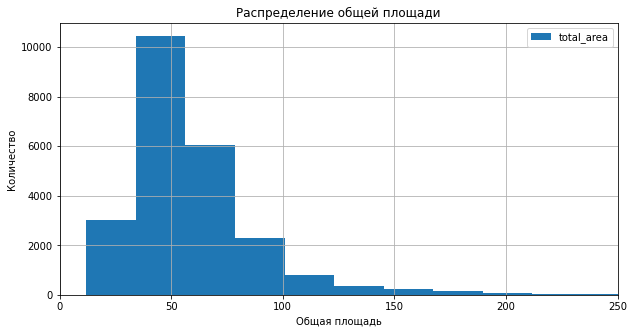

In [44]:
real_estate_data[['total_area']].plot(kind='hist',grid=True, bins=40,xlim=(0,250), figsize = (10,5), title = 'Распределение общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Количество')
plt.show()

Эта гистограмма показывает, что большинство квартир имеют площадь (30-60)м^2 

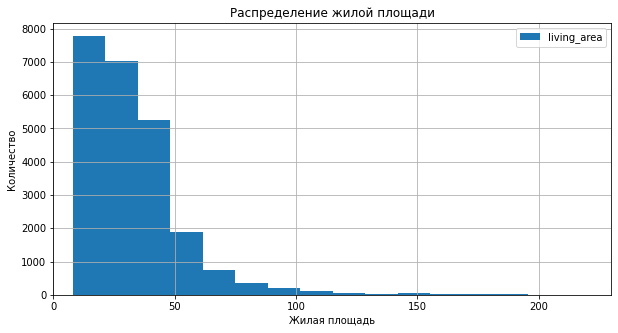

In [45]:
real_estate_data[['living_area']].plot(kind='hist',grid=True, bins=30,xlim=(0,230), figsize = (10,5), title = 'Распределение жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество')
plt.show()

Эта гистограмма показывает, что большинство квартир  находится в диапазоне  до 50 по жилой площади 

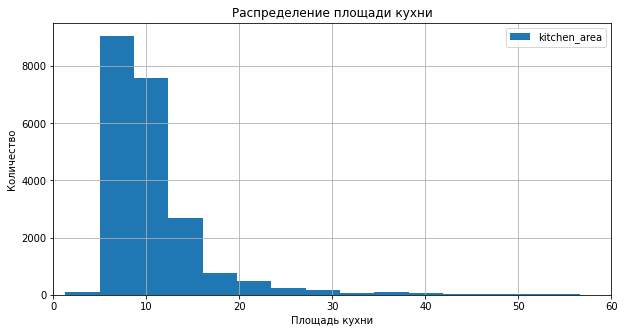

In [46]:
real_estate_data[['kitchen_area']].plot(kind='hist',grid=True, bins=30,xlim=(0,60), figsize = (10,5), title = 'Распределение площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Количество')
plt.show()

Эта гистограмма показывает, что большинство квартир  находится в диапазоне от от 5 м^2 до 12 м^2 по  площади кухни 

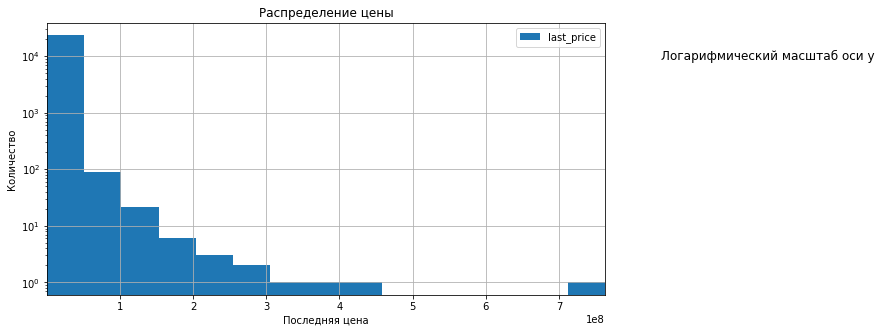

In [47]:
min_price = real_estate_data['last_price'].min()
max_price = real_estate_data['last_price'].max()
real_estate_data[['last_price']].plot(kind='hist',grid=True, bins=15,xlim=(min_price,max_price), figsize = (10,5), title = 'Распределение цены', logy = True)
plt.xlabel('Последняя цена')
plt.ylabel('Количество')
plt.annotate('Логарифмический масштаб оси y', xy=(1.1, 0.90), xycoords='axes fraction', fontsize=12, ha='left', va='top')
plt.show()

Эта гистограмма показывает, что большинство квартир находится в  ценовом сегменте до 50 млн, но после 50 млн можно заметить плавное измнение цены до 400млн, без выбросов
но есть значение которое > 700 млн

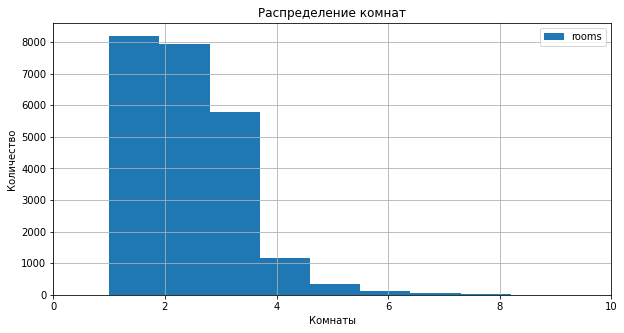

In [48]:
real_estate_data[['rooms']].plot(kind='hist',grid=True, bins=20,xlim=(0,10), figsize = (10,5), title = 'Распределение комнат')
plt.xlabel('Комнаты')
plt.ylabel('Количество')
plt.show()

Здесь можно заметить, что большинство квартир это 1-3 комнатные, а 4ех комнатных уже в 2.5 раза меньше

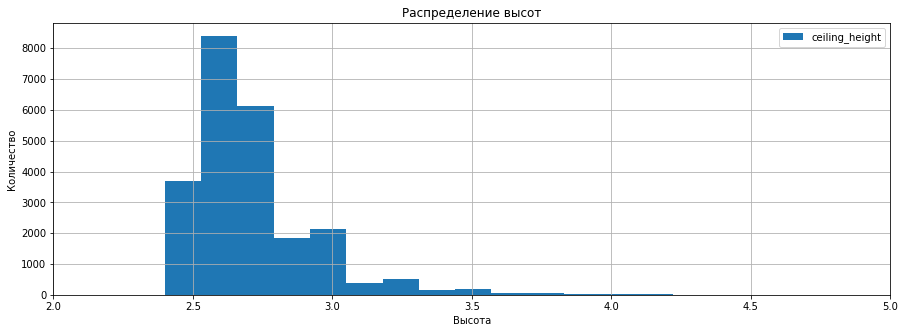

In [49]:
real_estate_data[['ceiling_height']].plot(kind='hist',grid=True, bins=20,xlim=(2,5), figsize = (15,5), title = 'Распределение высот')
plt.xlabel('Высота')
plt.ylabel('Количество')
plt.show()

На этой гистограмме заметно, что большинство квартир имеют высоту потолков от 2.55 до 2.75

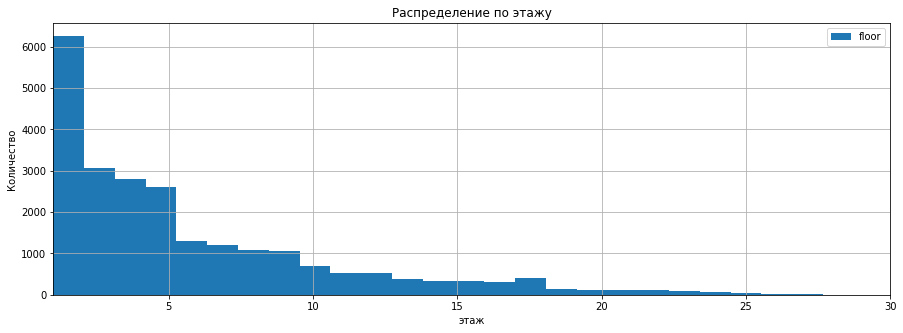

In [50]:
real_estate_data[['floor']].plot(kind='hist',grid=True, bins=30,xlim=(1,30), figsize = (15,5), title = 'Распределение по этажу')
plt.xlabel('этаж')
plt.ylabel('Количество')
plt.show()

На этой гистограмме можно заметить, что квартиры преимущественно на 1-5 этаже

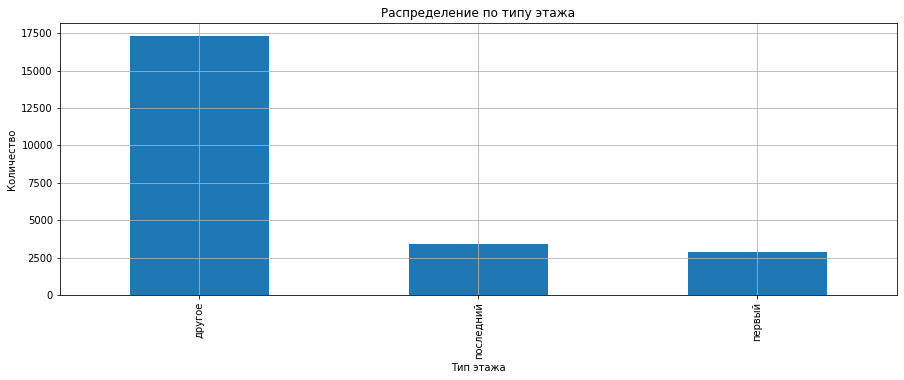

In [51]:
counts = real_estate_data['floor_type'].value_counts()

counts.plot(kind='bar',grid=True,  figsize = (15,5), title = 'Распределение по типу этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Количество')

plt.show()

На этой гистограмме можно заметить, что квартир на последнем этаже несущественно больше чем на первом, но естественно на остальных этажах квартир будет больше

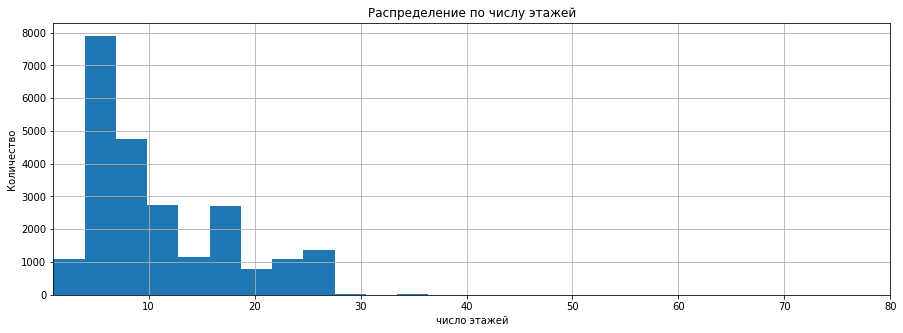

In [52]:
real_estate_data['floors_total'].plot(kind='hist',grid=True, bins=20,xlim=(1,80), figsize = (15,5), title = 'Распределение по числу этажей')
plt.xlabel('число этажей')
plt.ylabel('Количество')
plt.show()

На этой гистограмме можно заметить, что большинство зданий - малоэтажки у которых 3-6 этажей. Но не весомое кол-во имеют 11 и 16 этажей. 

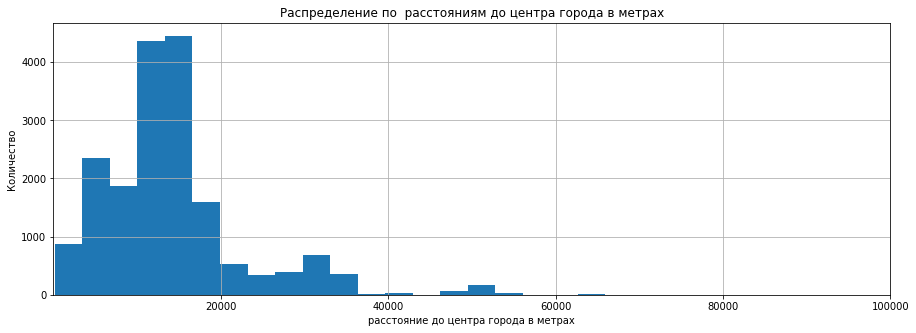

In [53]:
real_estate_data['cityCenters_nearest'].plot(kind='hist',grid=True, bins=20,xlim=(1,100000), figsize = (15,5), title = 'Распределение по  расстояниям до центра города в метрах')
plt.xlabel('расстояние до центра города в метрах')
plt.ylabel('Количество')
plt.show()

На этой гистограмме можно заметить, что большинство зданий находится на расстоянии  1000-1800м до центра

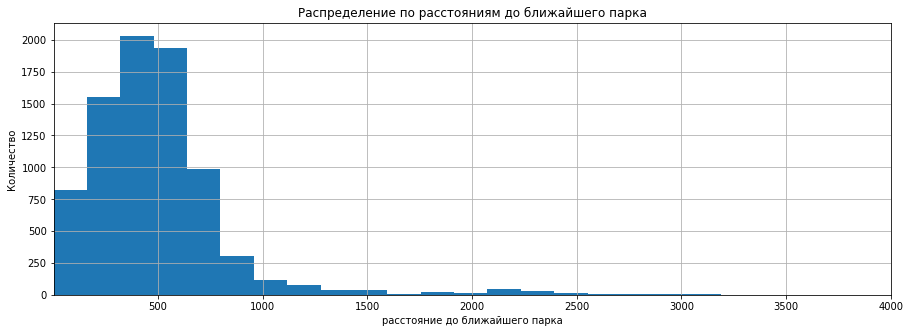

In [54]:
real_estate_data['parks_nearest'].plot(kind='hist',grid=True, bins=20,xlim=(1,4000), figsize = (15,5), title = 'Распределение по расстояниям до ближайшего парка')
plt.xlabel('расстояние до ближайшего парка')
plt.ylabel('Количество')
plt.show()

На этой гистограмме можно заметить, что большинство зданий находится в пределах 1км до парка

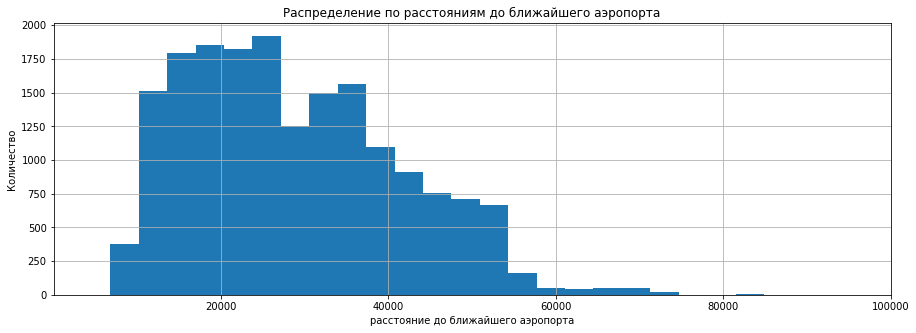

In [55]:
real_estate_data['airports_nearest'].plot(kind='hist',grid=True, bins=25,xlim=(1,100000), figsize = (15,5), title = 'Распределение по расстояниям до ближайшего аэропорта')
plt.xlabel('расстояние до ближайшего аэропорта')#я тут еле из себя выжал как их подписать, вроде логично, но слова в голову не лезут)
plt.ylabel('Количество')
plt.show()

На этой гистограмме можно заметить, что большинство зданий находится в пределах от 10км до 37км до аэропорта

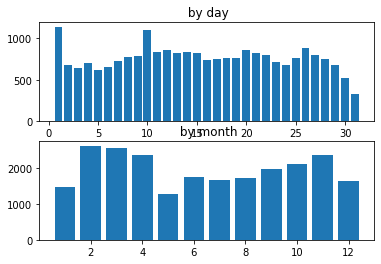

In [56]:
grouped = real_estate_data.groupby(['publication_month', 'publication_day'])['floor'].sum().reset_index()

# Строим гистограмму
sales_by_day = real_estate_data.groupby('publication_day')['floor'].count()
sales_by_month = real_estate_data.groupby('publication_month')['floor'].count()

fig, axs = plt.subplots(2)

axs[0].bar(sales_by_day.index, sales_by_day.values)
axs[0].set_title(' by day')

axs[1].bar(sales_by_month.index, sales_by_month.values)
axs[1].set_title(' by month')

plt.show()

если рассматривать по дням то немного выделяются 1ый и 10ый день  
если рассматривать по месяцам то немного выделяются фев, март, апрель, ноябрь - в сторону роста числа покупок, а май и январь - в сторону уменьшения числа покупок   

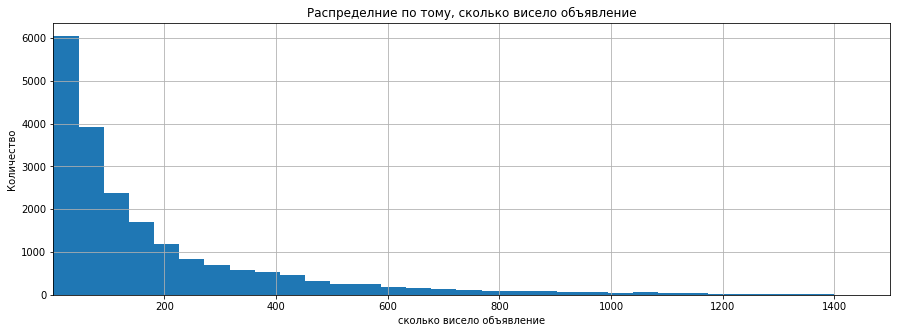

In [57]:
real_estate_data['days_exposition'].plot(kind='hist',grid=True, bins=35,xlim=(1,1500), figsize = (15,5), title = 'Распределние по тому, сколько висело объявление')
plt.xlabel('сколько висело объявление')#я тут еле из себя выжал как их подписать, вроде логично, но слова в голову не лезут)
plt.ylabel('Количество')
plt.show()

In [58]:
real_estate_data['days_exposition'].agg(['mean','median','min','max','std'])

mean       180.870256
median      95.000000
min          1.000000
max       1580.000000
std        219.854984
Name: days_exposition, dtype: float64

Стандартное отклонение больше медианы,  можно считать, что данные имеют большой разброс и могут быть выбросы.  
В этом случае, можно рассмотреть только те продажи, которые находятся в интервале между первым и третьим квартилями

In [59]:
q1 = real_estate_data['days_exposition'].quantile(0.25)
q3 = real_estate_data['days_exposition'].quantile(0.75)
scope_q = q3 - q1
fast_sales = real_estate_data[(real_estate_data['days_exposition'] <= q1 - 1.5*scope_q)]
slow_sales = real_estate_data[(real_estate_data['days_exposition'] >= q3 + 1.5*scope_q)]

In [60]:
fast_sales

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,publication_day,publication_month,publication_year,floor_type,distance_to_city_center_km


<AxesSubplot:>

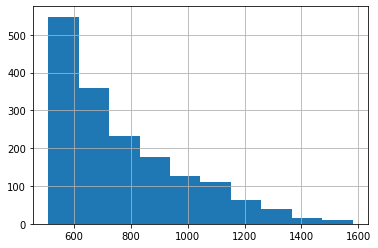

In [61]:
slow_sales.sort_values(by='days_exposition')['days_exposition'].hist()

In [62]:
slow_sales['days_exposition'].agg(['min','max'])

min     510.0
max    1580.0
Name: days_exposition, dtype: float64

In [63]:
slow_sales['days_exposition'].median()

704.0000000000001

Так как при росте времени продажи уменьшается кол-во таких квартир и происходит это более менее плавно, то можно взять за начальное значение необычно долгих -  медиану полученного отрезка (510,1580)

минимальное время - 1 день  
максимальное время - 1580 дней  
Данные похожи на подозрительные  
Если посмотреть на соотношение медианы и среднего значения, то можно понять, что есть значения которые продавались очень долго, но такое и вправду может быть, так как есть много параметров которые могут оттолкнуть от покупки квартиры  
Средняя продолжительность продажи - 181 день 
Медианная продолжительность продажи - 95 дней  
Необычно долгие продажи начинаются от 704 дней  

In [64]:
corr, p_value = pearsonr(real_estate_data['last_price'], real_estate_data['total_area'])
print(f"Коэффициент корреляции Пирсона: {corr:.2f}")

Коэффициент корреляции Пирсона: 0.65


Можно сделать вывод о наличии сильной положительной линейной связи между общей площадью и стоимостью

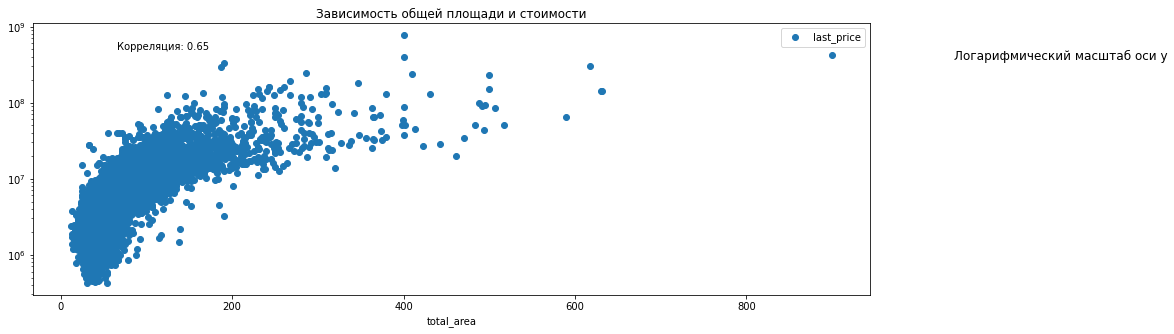

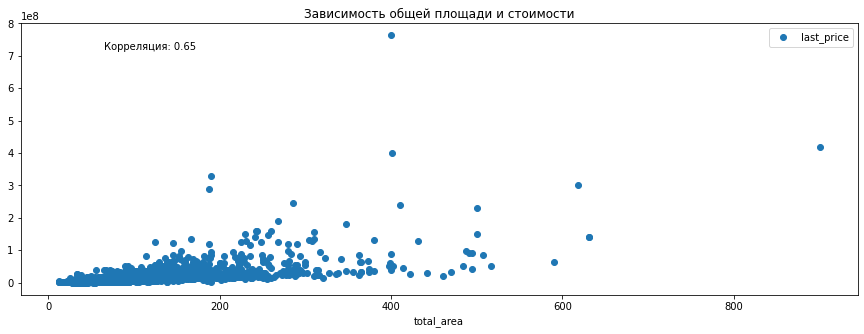

In [65]:
real_estate_data.plot(y = 'last_price', x = 'total_area', style='o',figsize=(15,5),logy = True,title='Зависимость общей площади и стоимости')
plt.annotate('Логарифмический масштаб оси y', xy=(1.1, 0.90), xycoords='axes fraction', fontsize=12, ha='left', va='top')
plt.text(x=0.1, y=0.9, s=f'Корреляция: {corr:.2f}', transform=plt.gca().transAxes)
plt.show()
real_estate_data.plot(y = 'last_price', x = 'total_area', style='o',figsize=(15,5), title='Зависимость общей площади и стоимости')
plt.text(x=0.1, y=0.9, s=f'Корреляция: {corr:.2f}', transform=plt.gca().transAxes)
plt.show()

По данной диаграмме рассеяния можно заметить, что есть прямая зависимость между размером квартиры и ее стоимостью 

In [66]:
corr, p_value = pearsonr(real_estate_data['last_price'], real_estate_data['living_area'])
print(f"Коэффициент корреляции Пирсона: {corr:.2f}")

Коэффициент корреляции Пирсона: 0.56


Можно сделать вывод о наличии  средней положительной линейной связи между жилой площадью и стоимостью

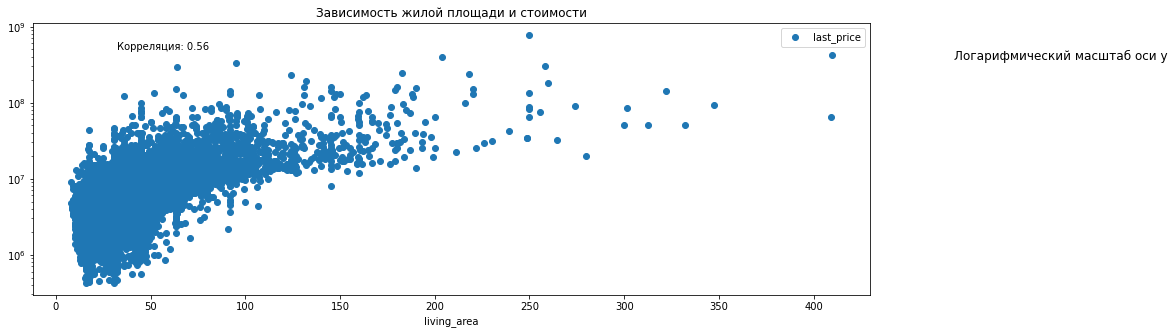

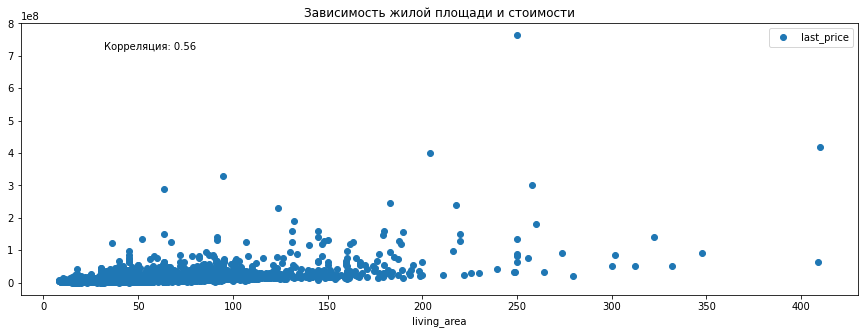

In [67]:
real_estate_data.plot(y = 'last_price', x = 'living_area', style='o',figsize=(15,5),logy = True,title='Зависимость жилой площади и стоимости')
plt.annotate('Логарифмический масштаб оси y', xy=(1.1, 0.90), xycoords='axes fraction', fontsize=12, ha='left', va='top')
plt.text(x=0.1, y=0.9, s=f'Корреляция: {corr:.2f}', transform=plt.gca().transAxes)
plt.show()
real_estate_data.plot(y = 'last_price', x = 'living_area', style='o',figsize=(15,5),title='Зависимость жилой площади и стоимости')
plt.text(x=0.1, y=0.9, s=f'Корреляция: {corr:.2f}', transform=plt.gca().transAxes)
plt.show()

По данной диаграмме рассеяния можно заметить, что есть  зависимость между жилой площадью квартиры и ее стоимостью 

In [68]:
kitchen_wt_nan = real_estate_data.drop(real_estate_data[real_estate_data['kitchen_area'].isna()].index)
corr, p_value = pearsonr(kitchen_wt_nan['last_price'],kitchen_wt_nan['kitchen_area'])
print(f"Коэффициент корреляции Пирсона: {corr:.2f}")
#kitchen_wt_nan

Коэффициент корреляции Пирсона: 0.52


Можно сделать вывод о наличии  средней положительной линейной связи между  площадью кухни и стоимостью

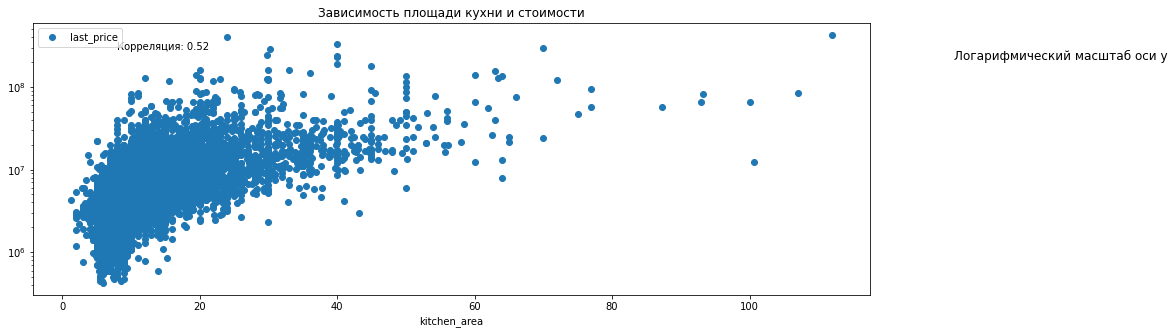

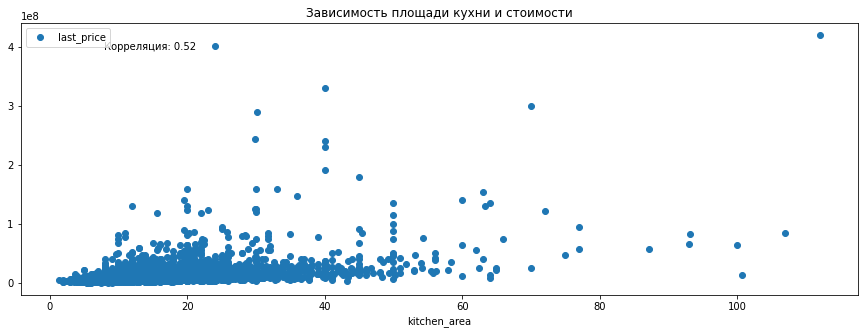

In [69]:
real_estate_data.plot(y = 'last_price', x = 'kitchen_area', style='o',figsize=(15,5),logy = True,title='Зависимость площади кухни и стоимости')
plt.annotate('Логарифмический масштаб оси y', xy=(1.1, 0.90), xycoords='axes fraction', fontsize=12, ha='left', va='top')
plt.text(x=0.1, y=0.9, s=f'Корреляция: {corr:.2f}', transform=plt.gca().transAxes)
plt.show()
real_estate_data.plot(y = 'last_price', x = 'kitchen_area', style='o',figsize=(15,5),title='Зависимость площади кухни и стоимости')
plt.text(x=0.1, y=0.9, s=f'Корреляция: {corr:.2f}', transform=plt.gca().transAxes)
plt.show()

In [70]:

corr, p_value = pearsonr(real_estate_data['last_price'], real_estate_data['ceiling_height'])
print(f"Коэффициент корреляции Пирсона: {corr:.2f}")

Коэффициент корреляции Пирсона: 0.29


Можно сделать вывод о наличии некоторой слабой положительной линейной связи между высотой и стоимостью

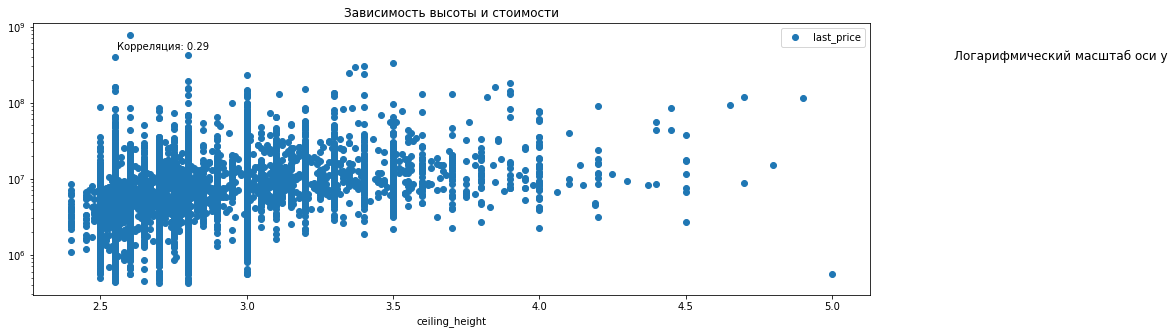

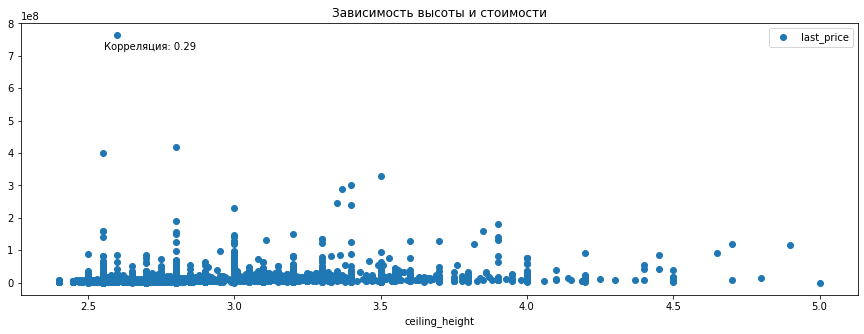

In [71]:
real_estate_data.plot(y = 'last_price', x = 'ceiling_height', style='o',figsize=(15,5),logy = True,title='Зависимость высоты и стоимости')
plt.annotate('Логарифмический масштаб оси y', xy=(1.1, 0.90), xycoords='axes fraction', fontsize=12, ha='left', va='top')
plt.text(x=0.1, y=0.9, s=f'Корреляция: {corr:.2f}', transform=plt.gca().transAxes)
plt.show()
real_estate_data.plot(y = 'last_price', x = 'ceiling_height', style='o',figsize=(15,5),title='Зависимость высоты и стоимости')
plt.text(x=0.1, y=0.9, s=f'Корреляция: {corr:.2f}', transform=plt.gca().transAxes)
plt.show()

По данной диаграмме рассеяния можно заметить, что есть  зависимость между высотой квартиры и ее стоимостью, но в большинстве случаев это касается минимальной стоимости для каждой группы высот

In [72]:
corr, p_value = pearsonr(real_estate_data['last_price'], real_estate_data['floor'])
print(f"Коэффициент корреляции Пирсона: {corr:.2f}")

Коэффициент корреляции Пирсона: 0.03


Можно сделать вывод что между этажом и стоимостью практически нет линейной связи

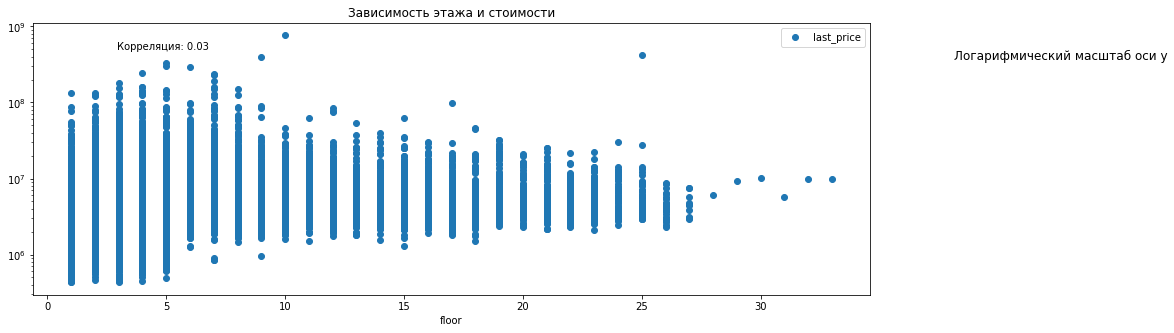

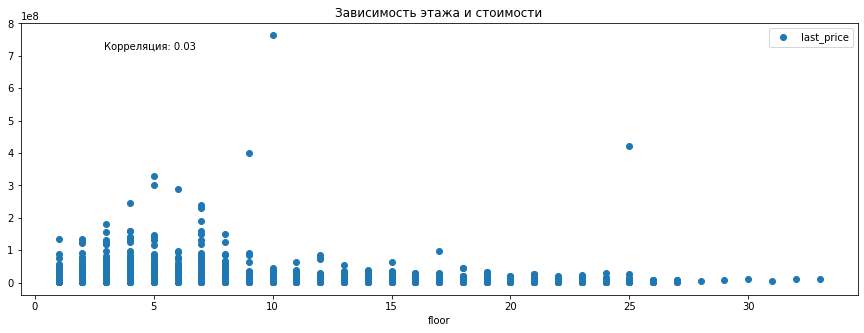

In [73]:
real_estate_data.plot(y = 'last_price', x = 'floor', style='o',figsize=(15,5),logy = True, title='Зависимость этажа и стоимости')
plt.annotate('Логарифмический масштаб оси y', xy=(1.1, 0.90), xycoords='axes fraction', fontsize=12, ha='left', va='top')
plt.text(x=0.1, y=0.9, s=f'Корреляция: {corr:.2f}', transform=plt.gca().transAxes)
plt.show()
real_estate_data.plot(y = 'last_price', x = 'floor', style='o',figsize=(15,5),title='Зависимость этажа и стоимости')
plt.text(x=0.1, y=0.9, s=f'Корреляция: {corr:.2f}', transform=plt.gca().transAxes)
plt.show()

По данной диаграмме рассеяния можно заметить, что есть некоторый скачок по минимальной цене, но прямой зависимости здесь нет

По данной диаграмме рассеяния можно заметить, что есть  зависимость между этажом квартиры и ее стоимостью, но в большинстве случаев это касается минимальной стоимости для каждой группы этажей

[Text(0.5, 1.0, 'Зависимость типа этажа и стоимости')]

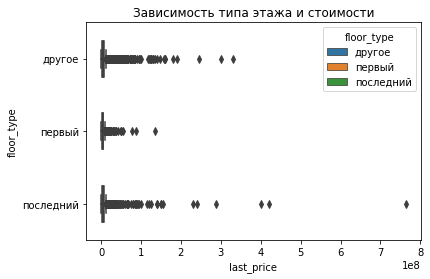

In [74]:
sns.boxplot(x='last_price', y='floor_type', data=real_estate_data, hue="floor_type", dodge=False,width=0.5).set(title='Зависимость типа этажа и стоимости')

Здесь можно заметить, что предпочтение отдают на "других" этажах, после предпочтение падает на "последний", а вот первый этаж люди | не готовы покупать за ту же цену, что у других вариантов. 

Text(0.5, 1.0, 'Зависимость типа этажа и стоимости')

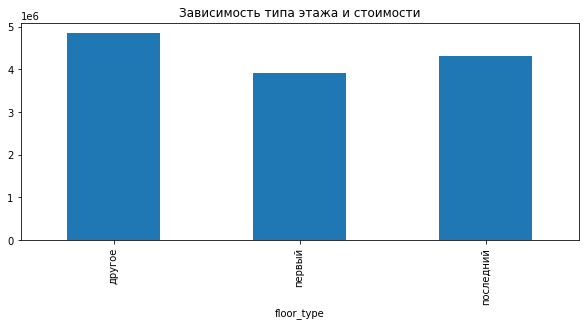

In [75]:
real_estate_data.groupby('floor_type')['last_price'].median().plot(x='floor_type', y='last_price', kind='bar',figsize=(10,4))
plt.title('Зависимость типа этажа и стоимости')

In [76]:
corr, p_value = pearsonr(real_estate_data['last_price'], real_estate_data['publication_month'])
print(f"Коэффициент корреляции Пирсона: {corr:.2f}")

Коэффициент корреляции Пирсона: 0.00


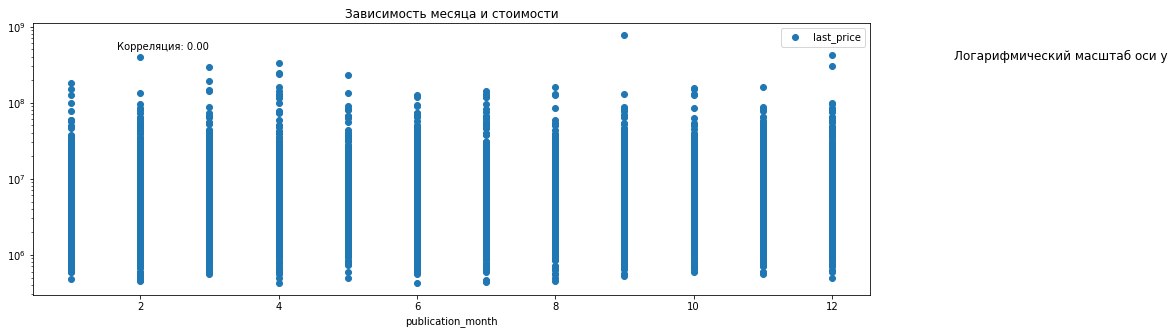

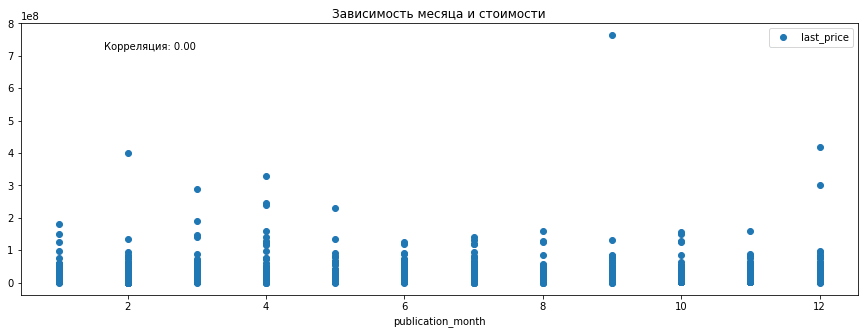

In [77]:
real_estate_data.plot(y = 'last_price', x = 'publication_month', style='o',figsize=(15,5),logy = True,title='Зависимость месяца и стоимости')
plt.annotate('Логарифмический масштаб оси y', xy=(1.1, 0.90), xycoords='axes fraction', fontsize=12, ha='left', va='top')
plt.text(x=0.1, y=0.9, s=f'Корреляция: {corr:.2f}', transform=plt.gca().transAxes)
plt.show()
real_estate_data.plot(y = 'last_price', x = 'publication_month', style='o',figsize=(15,5), title='Зависимость месяца и стоимости')
plt.text(x=0.1, y=0.9, s=f'Корреляция: {corr:.2f}', transform=plt.gca().transAxes)
plt.show()

Text(0.5, 1.0, 'Зависимость месяца и стоимости')

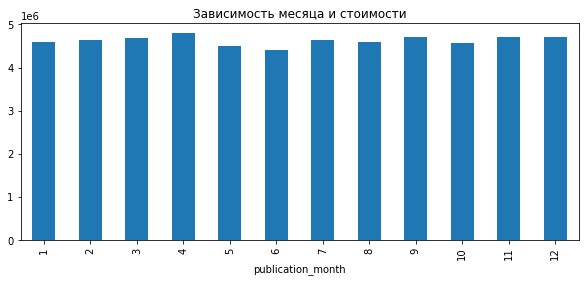

In [78]:
real_estate_data.groupby('publication_month')['last_price'].median().plot(x='publication_month', y='last_price', kind='bar',figsize=(10,4))
plt.title('Зависимость месяца и стоимости')

Зависимости между месяцем продажи и стоимостью нет

In [79]:
corr, p_value = pearsonr(real_estate_data['last_price'], real_estate_data['publication_day'])
print(f"Коэффициент корреляции Пирсона: {corr:.2f}")

Коэффициент корреляции Пирсона: 0.01


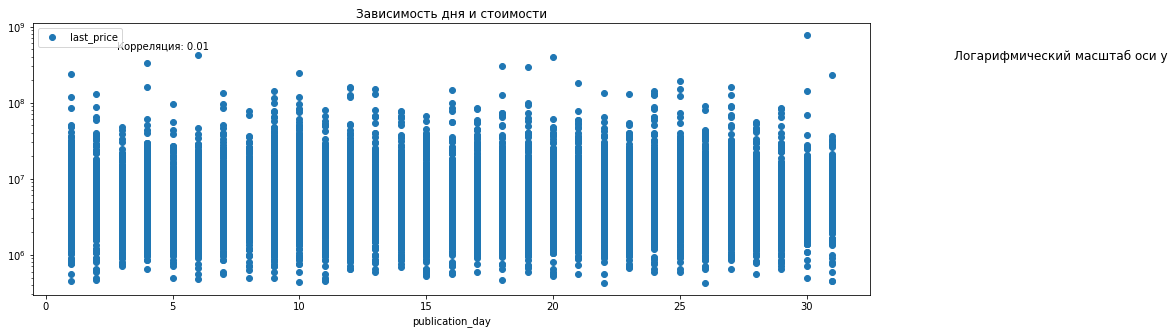

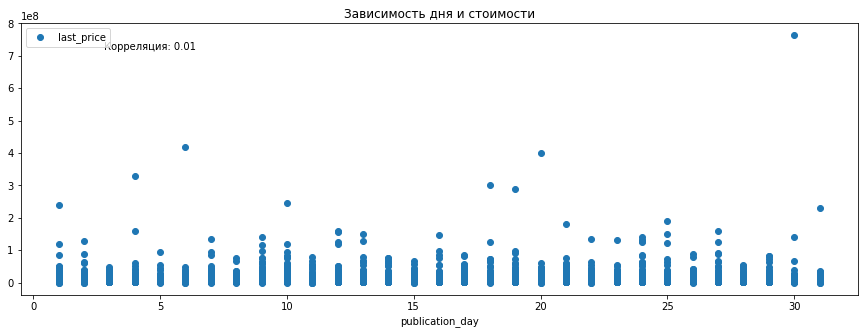

In [80]:
real_estate_data.plot(y = 'last_price', x = 'publication_day', style='o',figsize=(15,5),logy = True,title='Зависимость дня и стоимости')
plt.annotate('Логарифмический масштаб оси y', xy=(1.1, 0.90), xycoords='axes fraction', fontsize=12, ha='left', va='top')
plt.text(x=0.1, y=0.9, s=f'Корреляция: {corr:.2f}', transform=plt.gca().transAxes)
plt.show()
real_estate_data.plot(y = 'last_price', x = 'publication_day', style='o',figsize=(15,5),title='Зависимость дня и стоимости')
plt.text(x=0.1, y=0.9, s=f'Корреляция: {corr:.2f}', transform=plt.gca().transAxes)
plt.show()

Text(0.5, 1.0, 'Зависимость дня и стоимости')

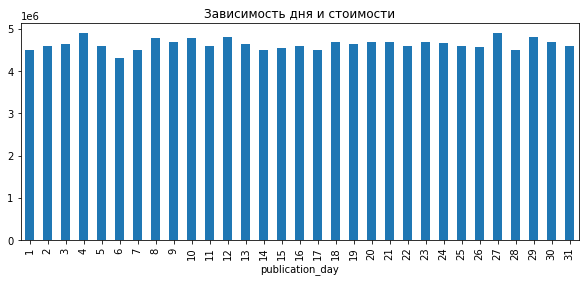

In [81]:
real_estate_data.groupby('publication_day')['last_price'].median().plot(x='publication_day', y='last_price', kind='bar',figsize=(10,4))
plt.title('Зависимость дня и стоимости')

Зависимости между днем продажи и стоимостью нет

In [82]:
corr, p_value = pearsonr(real_estate_data['last_price'], real_estate_data['publication_year'])
print(f"Коэффициент корреляции Пирсона: {corr:.2f}")

Коэффициент корреляции Пирсона: -0.04


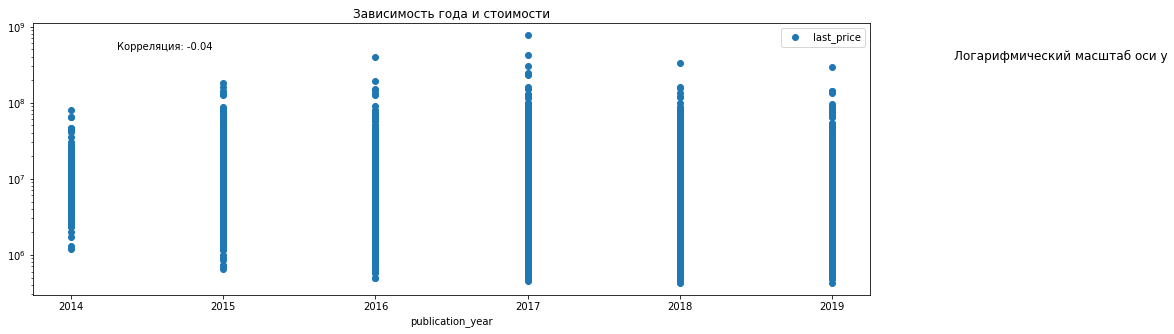

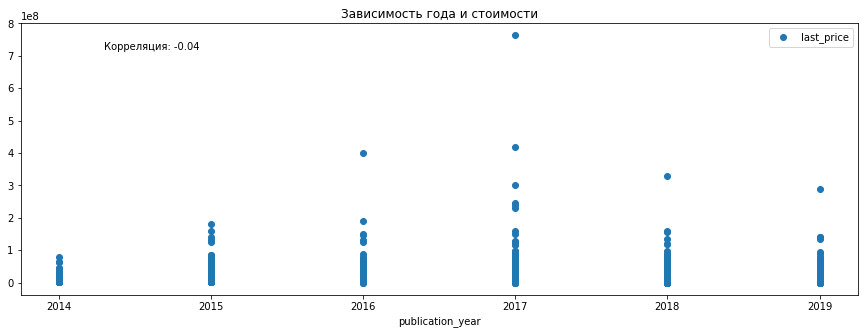

In [83]:
real_estate_data.plot(y = 'last_price', x = 'publication_year', style='o',figsize=(15,5),logy = True,title='Зависимость года и стоимости')
plt.annotate('Логарифмический масштаб оси y', xy=(1.1, 0.90), xycoords='axes fraction', fontsize=12, ha='left', va='top')
plt.text(x=0.1, y=0.9, s=f'Корреляция: {corr:.2f}', transform=plt.gca().transAxes)
plt.show()
real_estate_data.plot(y = 'last_price', x = 'publication_year', style='o',figsize=(15,5),title='Зависимость года и стоимости')
plt.text(x=0.1, y=0.9, s=f'Корреляция: {corr:.2f}', transform=plt.gca().transAxes)
plt.show()

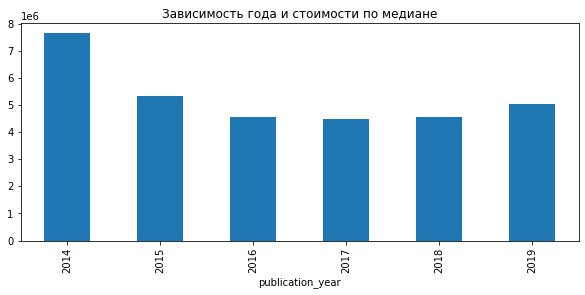

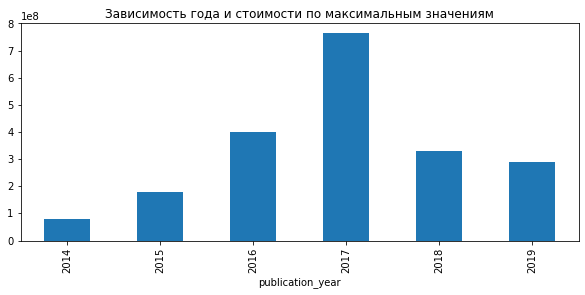

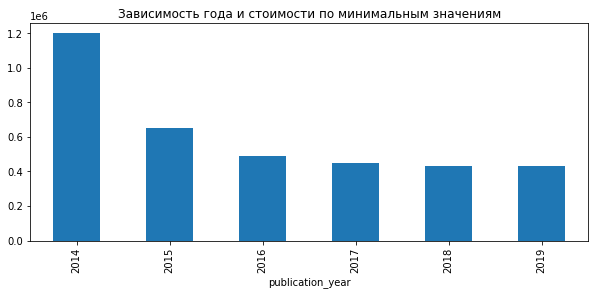

In [84]:
real_estate_data.groupby('publication_year')['last_price'].median().plot(x='publication_year', y='last_price', kind='bar',figsize=(10,4))
plt.title('Зависимость года и стоимости по медиане')
plt.show()
real_estate_data.groupby('publication_year')['last_price'].max().plot(x='publication_year', y='last_price', kind='bar',figsize=(10,4))
plt.title('Зависимость года и стоимости по максимальным значениям')
plt.show()
real_estate_data.groupby('publication_year')['last_price'].min().plot(x='publication_year', y='last_price', kind='bar',figsize=(10,4))
plt.title('Зависимость года и стоимости по минимальным значениям')
plt.show()

С течением лет появились как и более дешевые квартиры, так и более дорогие, но повышение не существенно

In [85]:
locality_params_list= real_estate_data.groupby('locality_name')['meter_price'].count().sort_values(ascending=False).head(10).index.to_list()
locality_params =real_estate_data[real_estate_data['locality_name'].isin(locality_params_list)].groupby('locality_name')['meter_price'].agg(['mean','min','max','median'])
locality_params

,mean,min,max,median
locality_name,,,,
Всеволожск,68627.308287,31400.00,640422.35,65789.470
Выборг,58141.909325,18750.00,107473.12,58158.320
Гатчина,68746.146515,10507.25,146315.79,67796.610
Колпино,75424.579112,47957.37,125000.00,74723.745
Пушкин,103125.819377,59836.07,256521.74,100000.000
Санкт-Петербург,114849.670804,15345.27,1907500.00,104761.900
деревня Кудрово,92473.547559,54160.35,142857.14,91860.470
поселок Мурино,85517.977029,50000.00,138580.25,85697.395
поселок Парголово,90175.913089,39205.96,138522.43,91642.860


In [86]:
locality_params.sort_values('min').head(1)

,mean,min,max,median
locality_name,,,,
Гатчина,68746.146515,10507.25,146315.79,67796.61


In [87]:
locality_params.sort_values('max').tail(1)

,mean,min,max,median
locality_name,,,,
Санкт-Петербург,114849.670804,15345.27,1907500.0,104761.9


Санкт-Петербург	- максимальная стоимость квадрата  1907500.0,  средняя стоимость квадрата - 114849.67  
Гатчина - минимальная стоимость квадрата 10507.25,  средняя стоимость квадрата - 68746.1

In [88]:
data_spb = real_estate_data[real_estate_data['locality_name'] == 'Санкт-Петербург']
data_spb = data_spb.groupby('distance_to_city_center_km')['last_price'].agg('mean')
data_spb

distance_to_city_center_km
0.0     3.144912e+07
1.0     2.120672e+07
2.0     1.778832e+07
3.0     1.112658e+07
4.0     1.330428e+07
5.0     1.449912e+07
6.0     1.524821e+07
7.0     1.480505e+07
8.0     9.957717e+06
9.0     6.962379e+06
10.0    6.504119e+06
11.0    6.250815e+06
12.0    5.832149e+06
13.0    6.084366e+06
14.0    5.632287e+06
15.0    5.886924e+06
16.0    5.373131e+06
17.0    5.299051e+06
18.0    5.091331e+06
19.0    5.037675e+06
20.0    6.041102e+06
21.0    5.493469e+06
22.0    5.415524e+06
23.0    4.985376e+06
24.0    3.854430e+06
25.0    4.052840e+06
26.0    3.973013e+06
27.0    8.300000e+06
28.0    5.026429e+06
29.0    4.236667e+06
Name: last_price, dtype: float64

<AxesSubplot:title={'center':'Связь между ценой и отдалением от города'}, xlabel='distance_to_city_center_km'>

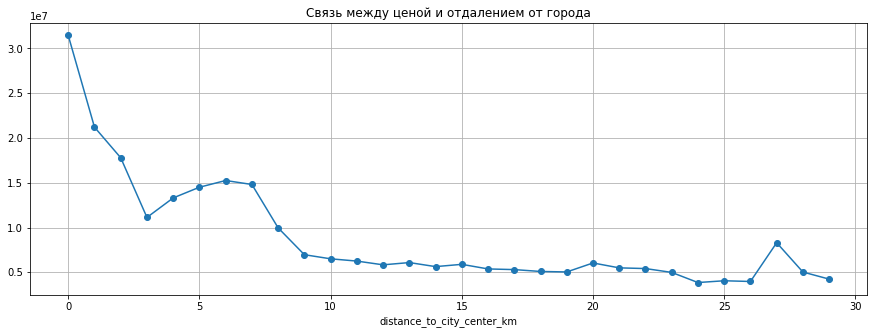

In [89]:
data_spb.plot(figsize=(15,5),style='o-',grid=True,title='Связь между ценой и отдалением от города')

На графике можно увидеть тенденцию к уменьшению цены на отдалении от центра  
Есть несколько локальных ростов, что может быть связано с хорошим расположением района 

### Общий вывод


   Было исправлено много "плохих значений"   
    По итогу удалены 71  строка    
    Были заменены типы столбцов на соответсвующие    
    Часть столбцов перестала содержать пустые значения  

Были добавлены важные данные, такие как :   
1.цена одного квадратного метра;     
2.день недели публикации объявления;    
3.месяц публикации объявления;    
4.год публикации объявления;    
5.тип этажа квартиры ;    
6.расстояние до центра города в километрах.  

 болшинство квартир:   
 -находится в диапазоне (30-60)м^2 по общей площади  
 -находится в диапазоне  до 50м^2 по жилой площади   
 -находится в диапазоне от 5 м^2 до 12 м^2  по  площади кухни   
 -находится в  ценовом сегменте до 50 млн, но после 50 млн можно заметить плавный спад числа квартир по приближении к 400млн  
 -это 1-3 комнатные  
 -имеют высоту потолков от 2.55 до 2.75  
 -на 1-5 этаже;  
   
 квартир на последнем этаже несущественно больше чем на первом, но естественно на остальных этажах квартир будет больше
  большинство зданий - малоэтажки у которых 3-6 этажей. Но не маленькое кол-во имеют 11 и 16 этажей. 
  большинство зданий находится на расстоянии  1000-1800м до центра
  большинство зданий находится в пределах 1км до парка
  большинство зданий находится в пределах от 10км до 37км до аэропорта
  
минимальное время продажи - 1 день  
максимальное время продажи - 1580 дней    
Если посмотреть на соотношение медианы и среднего значения, то можно понять, что есть значения которые продавались очень долго, но такое и вправду может быть, так как есть много параметров которые могут оттолкнуть от покупки квартиры  
Средняя продолжительность продажи - 181 день 
Медианная продолжительность продажи - 95 дней
Нормальная продолжительность- 95-181  
Необычно долгие продажи начинаются от 704 дней  

Есть прямая зависимость между размером квартиры и ее стоимостью | Коэффициент корреляции Пирсона: 0.65
Есть прямая зависимость между жилой площадью квартиры и ее стоимостью | Коэффициент корреляции Пирсона: 0.56
Есть зависимость между  площадью кухни квартиры и ее стоимостью |Коэффициент корреляции Пирсона: 0.52
Есть  зависимость между высотой  и стоимостью квартиры, но в большинстве случаев это касается минимальной стоимости для каждой группы высот | Коэффициент корреляции Пирсона: 0.29
Есть  зависимость между этажом квартиры и ее стоимостью, но в большинстве случаев это касается минимальной стоимости для каждой группы этажей
Стоимость первых этажей проседает


Санкт-Петербург - самые дорогие квартиры
Гатчина - самые дешевые квартиры